# Chapter 2: Small worlds and large worlds

In [71]:
import jax
import jax.numpy as np
import mcx

from matplotlib import pylab as plt
%matplotlib inline

In [72]:
print(f"MCX v{mcx.__version__}")
print(f"JAX v{jax.__version__}")

MCX v0.0.1
JAX v0.1.77


## Components of the model

In [73]:
from mcx.distributions import Binomial

The binomial distribution formula is built into mcx so you can compute the probability of 6 Ws in 9 tosses for every value of $p$:

In [74]:
np.exp(Binomial(0.5, 9).logpdf(6))

DeviceArray(0.1640631, dtype=float32)

## 2.4.3 Grid approximation

### With a uniform prior

In [75]:
def grid_posterior(n_points):
    p_grid = np.linspace(0, 1, n_points)
    prior = np.ones(n_points)
    likelihood = np.exp(Binomial(p_grid, 9).logpdf(6))
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / np.sum(unstd_posterior)
    return p_grid, posterior

Text(0, 0.5, 'poterior probability')

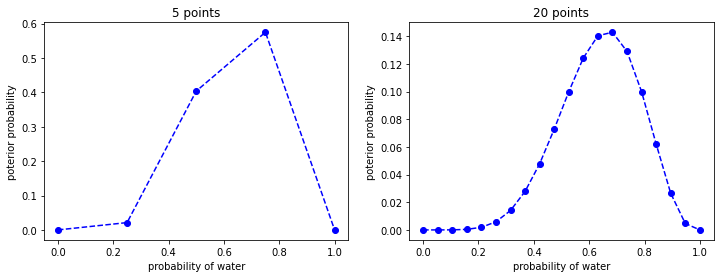

In [76]:
p_5, posterior_5 = grid_posterior(5)
p_20, posterior_20 = grid_posterior(20)

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(121)
ax1.plot(p_5, posterior_5, '--bo')
ax1.set_title("5 points")
ax1.set_xlabel("probability of water")
ax1.set_ylabel("poterior probability")

ax2 = fig.add_subplot(122)
ax2.plot(p_20, posterior_20, '--bo')
ax2.set_title("20 points")
ax2.set_xlabel("probability of water")
ax2.set_ylabel("poterior probability")

### With different priors

In [77]:
def grid_posterior_half_prior(n_points):
    """Compute the values of the posterior at fixed points. 
    
    The prior value is equal to 0 when the probability of water is smaller than 0.5,
    and 1 otherwise.
    """
    p_grid = np.linspace(0, 1, n_points)
    prior = np.where(p_grid < 0.5, 0, 1)
    likelihood = np.exp(Binomial(p_grid, 9).logpdf(6))
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / np.sum(unstd_posterior)
    return p_grid, posterior

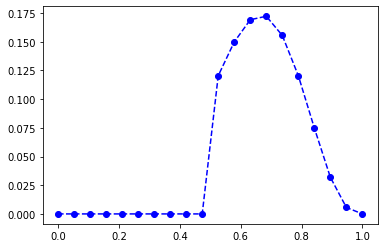

In [78]:
p_grid, posterior = grid_posterior_half_prior(20)
plt.plot(p_grid, posterior, '--bo')

In [79]:
def grid_posterior_exp_prior(n_points):
    """Compute the values of the posterior at fixed points. 
    
    The prior value is equal to $e^{-5 |p_{grid}-0.5|}$.
    """
    p_grid = np.linspace(0, 1, n_points)
    prior = np.exp(-5 * np.abs(p_grid-0.5))
    likelihood = np.exp(Binomial(p_grid, 9).logpdf(6))
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / np.sum(unstd_posterior)
    return p_grid, posterior

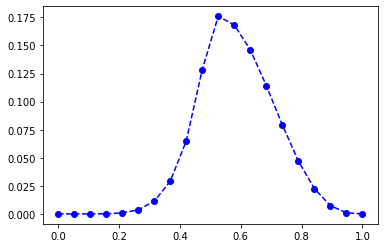

In [80]:
p_grid, posterior = grid_posterior_exp_prior(20)
plt.plot(p_grid, posterior, '--bo')

## 2.4.4 Quadratic appromixation

## 2.4.5 Markov Chain Monte Carlo